In [1]:
import pandas as pd
import seaborn as sns
from utils.dataLoader import DataLoader
from utils.dataProcessor import DataProcessor
import matplotlib.pyplot as plt

In [2]:
loader = DataLoader()

datadir = 'src/datasets'
files = ['amostra_projeto1.csv', 'amostra_projeto_2.csv', 'amostra_projeto_3.csv']

loader._load_data_from_path(datadir, files)
loader._load_predict_set(datadir, 'projeto_4.csv')

(              Info            Valor
 0           Titulo  Projeto 4 - Je3
 1        Tipologia          Sobrado
 2     Área Terreno           250,00
 3  Área Construída           257,00
 4    Área Fundação           221,36
 5     Área Fachada           430,11
 6      Área Parede           547,27
 7        Qtde BWCs             6,00,
         file           titulo tipologia  area_terreno  area_construída  \
 0  projeto_4  Projeto 4 - Je3   Sobrado         250.0            257.0   
 
    area_fundação  area_fachada  area_parede  qtde_bwcs  \
 0         221.36        430.11       547.27        6.0   
 
    area_construída_por_bwc  
 0                42.833333  )

In [3]:
loader.dfs['amostra_projeto1']['header']

,Info,Valor
0,Titulo,Projeto 1 - Wa
1,Tipologia,Térrea
2,Área Terreno,"485,00"
3,Área Construída,"246,63"
4,Área Fundação,"237,98"
5,Área Fachada,"597,88"
6,Área Parede,"615,86"
7,Qtde BWCs,"5,00"


In [4]:
loader.dfs['amostra_projeto1']['budget']
#faça contagem de valores nulos
loader.dfs['amostra_projeto1']['budget'].isnull().sum()

Item                          0
Referência                   59
Tipo                         59
Código                       59
Descrição                     0
Unid.                        59
Quantidade                   59
BDI                           0
Preço Material (Unitário)    79
Preço Material (Total)       34
Preço Execução (Unitário)    86
Preço Execução (Total)       32
Preço (Unitário)             59
Preço (Total)                 0
dtype: int64

Relações

In [5]:
processor = DataProcessor(loader)

In [6]:
processor._get_stats_by_key('amostra_projeto1')

,Preço Material (Unitário),Preço Material (Total),Preço Execução (Unitário),Preço Execução (Total),Preço (Unitário),Preço (Total)
count,72.000000,117.000000,65.000000,119.000000,92.000000,151.000000
mean,480.737500,17270.030940,328.507385,9534.377143,608.326957,20895.261656
std,843.584134,24043.951664,606.836134,14554.464268,876.974707,33851.230804
min,7.040000,2.430000,1.120000,1.120000,1.120000,1.120000
25%,54.362500,1941.230000,30.000000,934.650000,88.990000,1699.500000
50%,138.850000,6600.000000,80.000000,4888.260000,212.975000,7200.000000
75%,685.000000,23464.290000,205.000000,10869.525000,825.000000,25762.100000
max,5165.000000,148767.710000,3000.000000,91520.290000,5345.000000,233799.310000


In [7]:
processor._calculate_totals('amostra_projeto1')

{'total_material_cost': 2020593.62,
 'total_execution_cost': 1134590.88,
 'total_cost': 3155184.5100000007}

In [8]:
loader.dfs['amostra_projeto1']['header_T']

,file,titulo,tipologia,area_terreno,area_construída,area_fundação,area_fachada,area_parede,qtde_bwcs,area_construída_por_bwc
0,amostra_projeto1,Projeto 1 - Wa,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,49.326


In [9]:
budget_pj1 = loader.dfs['amostra_projeto1']['budget']

In [10]:
loader._grouping_item_totals(budget_pj1).sort_values('Preço (Total)', ascending=False)

,Descrição,Preço Material (Total),Preço Execução (Total),Preço (Total)
Item,,,,
4,SUPRAESTRUTURA,446303.13,255094.80,701397.93
3,INFRAESTRUTURA,286207.92,274560.87,560768.80
8,PISOS,261071.55,112066.56,373138.11
9,PAREDES,208938.66,123559.92,332498.58
11,ESQUADRIAS,185841.69,6300.00,192141.69
7,INSTALACOES HIDROSSANITARIAS,148798.50,28635.00,177433.50
13,INSTALACOES COMPLEMENTARES,152122.80,6390.60,158513.40
5,COBERTURA,122990.13,24525.00,147515.13
2,SERVICOS PRELIMINARES E GERAIS,34551.90,105591.00,140142.90


In [11]:
h_totals = processor.aggregate_header_totals()

In [12]:
all_tables = processor._concat_tables(h_totals)
all_tables

Descrição,file,titulo,tipologia,area_terreno,area_construída,area_fundação,area_fachada,area_parede,qtde_bwcs,area_construída_por_bwc,...,INSTALACOES COMPLEMENTARES,INSTALACOES ELETRICAS,INSTALACOES HIDROSSANITARIAS,"LIMPEZA, ACABAMENTOS E FINALIZACOES",PAREDES,PINTURAS,PISOS,SERVICOS PRELIMINARES E GERAIS,SONDAGEM,SUPRAESTRUTURA
0,amostra_projeto1,Projeto 1 - Wa,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,49.326000,...,158513.4,105740.7,177433.5,47659.37,332498.58,130827.03,373138.11,140142.9,NaN,701397.93
1,amostra_projeto_2,Projeto 2 - Ca,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0,62.310000,...,84943.5,107025.0,164595.0,44864.01,297016.71,148306.08,218822.48,118341.6,24258.75,687826.63
2,amostra_projeto_3,Projeto 3 - Je2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0,70.833333,...,446788.8,181942.5,262087.5,129447.39,479209.71,139903.21,460683.73,169831.8,NaN,1005869.87


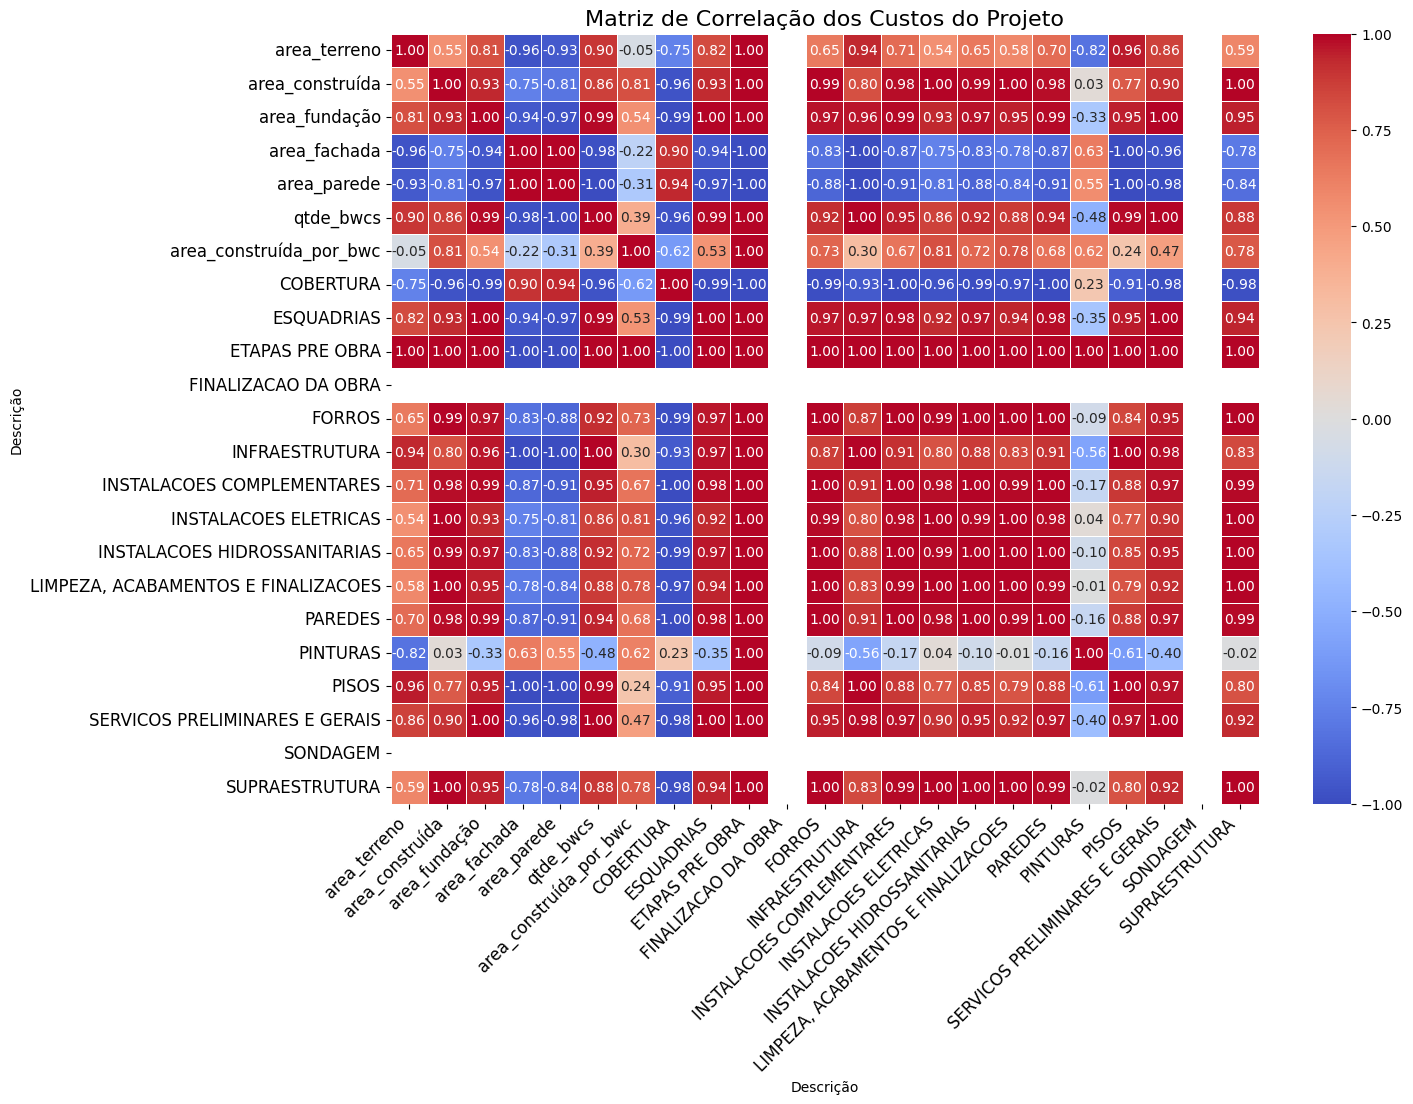

In [13]:
numeric_cols = all_tables.select_dtypes(include=['float64']).columns
corr = all_tables[numeric_cols].corr()
plt.figure(figsize=(14, 10))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Matriz de Correlação dos Custos do Projeto', fontsize=16)

plt.show()

In [14]:
h_totals

,file,titulo,tipologia,area_terreno,area_construída,area_fundação,area_fachada,area_parede,qtde_bwcs,area_construída_por_bwc,total_material_cost,total_execution_cost,total_cost
0,amostra_projeto1,Projeto 1 - Wa,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,49.326000,2020593.62,1134590.88,3155184.51
1,amostra_projeto_2,Projeto 2 - Ca,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0,62.310000,1645278.80,925623.15,2570901.95
2,amostra_projeto_3,Projeto 3 - Je2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0,70.833333,3092003.20,1477021.95,4569025.15


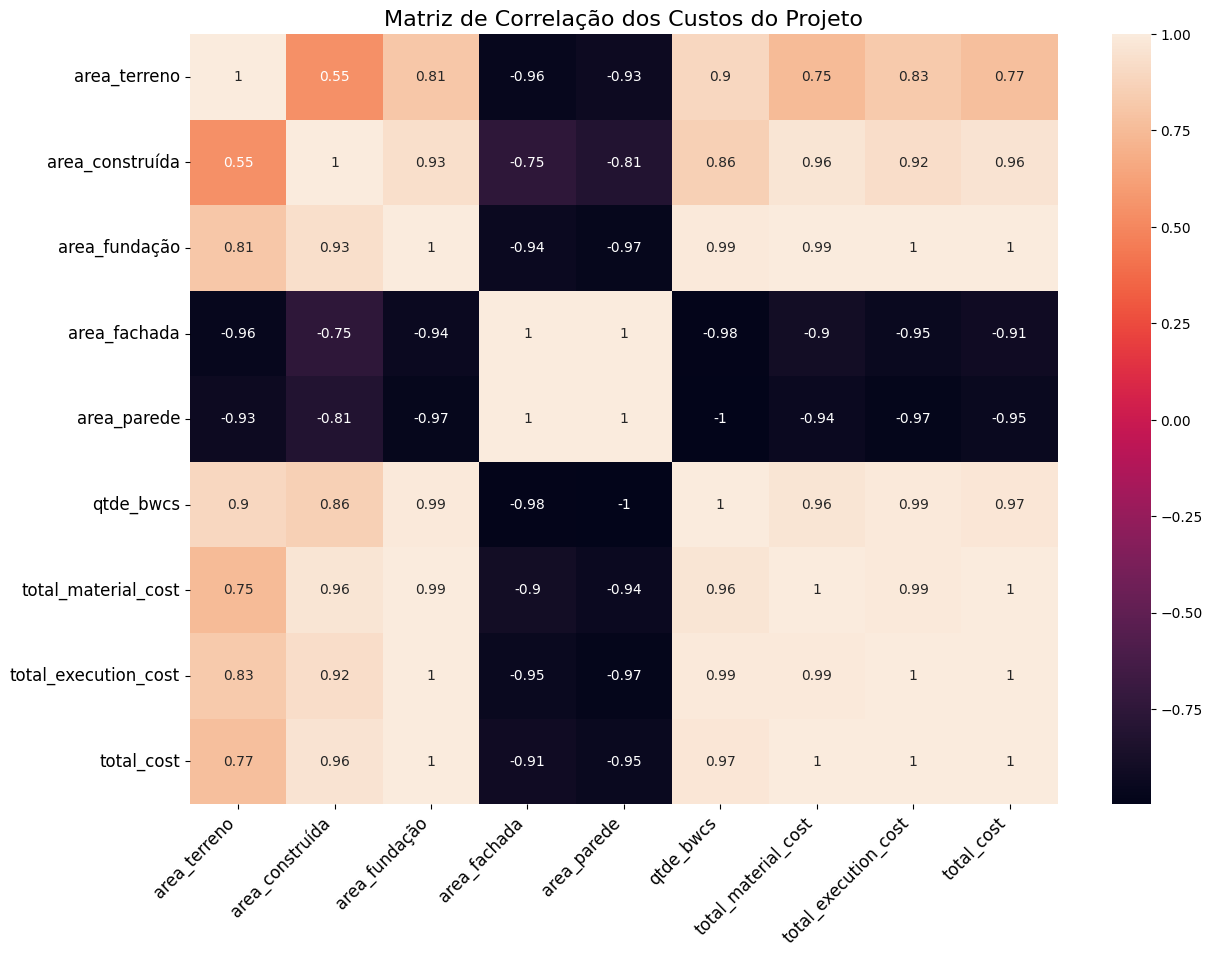

In [15]:
numeric_cols = [
    "area_terreno", 
    "area_construída", 
    "area_fundação", 
    "area_fachada", 
    "area_parede", 
    "qtde_bwcs",
    "area_construída_por_bwc",
    "area_fachada",
    "total_material_cost", 
    "total_execution_cost", 
    "total_cost"
]

plt.figure(figsize=(14, 10))

sns.heatmap(h_totals[numeric_cols].corr(), annot=True)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Matriz de Correlação dos Custos do Projeto', fontsize=16)

plt.show()

In [16]:
from utils.models import Predictor
header_totals = h_totals.copy()

totals = ['total_execution_cost','total_material_cost','total_cost']

In [17]:
prd = Predictor(header_totals)
for col in totals:
    train_cols = [col for col in header_totals.columns if col not in ['file', 'titulo', 'total_cost', 'total_execution_cost', 'total_material_cost']]
    X = header_totals[train_cols]
    y = header_totals[col]

    prd.fit(X,y)
    pred = prd.predict(loader.predict_df[train_cols])
    print(f'{col}: {round(pred[0],2)}')

total_execution_cost: 1058332.8
total_material_cost: 3038045.19
total_cost: 3993325.18


In [18]:
X = header_totals[train_cols]
y = header_totals[totals[2]]
prd.fit_stats_model(X,y)

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 16 Jun 2024   Prob (F-statistic):                nan
Time:                        19:47:15   Log-Likelihood:                 57.217
No. Observations:                   3   AIC:                            -108.4
Df Residuals:                       0   BIC:                            -111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/Users/vitao/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/vitao/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/vitao/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/vitao/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
